In [242]:
import csv
import sys
import urllib2
import dateutil
import dateutil.parser
from datetime import datetime
from collections import Counter


# Challenge 1

In [267]:
with open('turnstile_150404.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']
# creating empty dict that we pass data to
raw_readings = {}
# reading file row by row, creating tuple of first 3 elements for key.  All others are values
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))
    

In [268]:
print raw_readings.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'), [('NR', 'BMT', '03/28/2015', '00:00:00', 'REGULAR', '0005767857', '0003220197'), ('NR', 'BMT', '03/28/2015', '04:00:00', 'REGULAR', '0005767940', '0003220209'), ('NR', 'BMT', '03/28/2015', '08:00:00', 'REGULAR', '0005767967', '0003220241'), ('NR', 'BMT', '03/28/2015', '12:00:00', 'REGULAR', '0005768088', '0003220410'), ('NR', 'BMT', '03/28/2015', '16:00:00', 'REGULAR', '0005768421', '0003220635'), ('NR', 'BMT', '03/28/2015', '20:00:00', 'REGULAR', '0005768895', '0003220872'), ('NR', 'BMT', '03/29/2015', '00:00:00', 'REGULAR', '0005769125', '0003220951'), ('NR', 'BMT', '03/29/2015', '04:00:00', 'REGULAR', '0005769188', '0003220974'), ('NR', 'BMT', '03/29/2015', '08:00:00', 'REGULAR', '0005769209', '0003220986'), ('NR', 'BMT', '03/29/2015', '12:00:00', 'REGULAR', '0005769292', '0003221076'), ('NR', 'BMT', '03/29/2015', '16:00:00', 'REGULAR', '0005769545', '0003221279'), ('NR', 'BMT', '03/29/2015', '20:00:00', 'REGULAR', '0005769848', '0003221

# Challenge 2

In [269]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

In [270]:
for rows in datetime_cumulative.values():
    assert rows == sorted(rows)

In [328]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}
datetime_count_times.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [[datetime.datetime(2015, 3, 28, 0, 0), 83, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 28, 4, 0), 27, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 28, 8, 0), 121, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 28, 12, 0), 333, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 28, 16, 0), 474, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 28, 20, 0), 230, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 0, 0), 63, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 4, 0), 21, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 8, 0), 83, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 12, 0), 253, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 16, 0), 303, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 20, 0), 162, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3,

In [329]:
all_counts = [count
              for rows in datetime_count_times.values()
              for _, count, _ in rows]
all_counts.sort()

In [330]:
print all_counts[-5:]

[3132, 3502, 3854, 407303, 407345]


In [331]:
print all_counts[:5]

[-1874197078, -116970030, -3090944, -1367465, -608977]


In [396]:
all_times = [duration.seconds / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print Counter(all_times).most_common(10)

[(4, 184250), (0, 871), (3, 636), (1, 459), (2, 390), (8, 194), (7, 10), (12, 3), (16, 3), (6, 2)]


In [397]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}
print datetime_counts.items()[2]

(('B014', 'R148', '00-00-01', 'PARKSIDE AVE'), [(datetime.datetime(2015, 3, 28, 1, 0), 37), (datetime.datetime(2015, 3, 28, 5, 0), 160), (datetime.datetime(2015, 3, 28, 9, 0), 236), (datetime.datetime(2015, 3, 28, 13, 0), 249), (datetime.datetime(2015, 3, 28, 17, 0), 226), (datetime.datetime(2015, 3, 28, 21, 0), 147), (datetime.datetime(2015, 3, 29, 1, 0), 26), (datetime.datetime(2015, 3, 29, 5, 0), 114), (datetime.datetime(2015, 3, 29, 9, 0), 199), (datetime.datetime(2015, 3, 29, 13, 0), 199), (datetime.datetime(2015, 3, 29, 17, 0), 149), (datetime.datetime(2015, 3, 29, 21, 0), 84), (datetime.datetime(2015, 3, 30, 1, 0), 34), (datetime.datetime(2015, 3, 30, 5, 0), 844), (datetime.datetime(2015, 3, 30, 9, 0), 469), (datetime.datetime(2015, 3, 30, 13, 0), 336), (datetime.datetime(2015, 3, 30, 17, 0), 292), (datetime.datetime(2015, 3, 30, 21, 0), 100), (datetime.datetime(2015, 3, 31, 1, 0), 42), (datetime.datetime(2015, 3, 31, 5, 0), 841), (datetime.datetime(2015, 3, 31, 9, 0), 451), (da

In [398]:
all_good_counts = [count
                   for rows in datetime_counts.values()
                   for _, count in rows]
print len(all_good_counts) / len(all_counts)
all_good_counts.sort()
print all_good_counts[-5:]
print all_good_counts[:5]

0
[3045, 3052, 3132, 3502, 3854]
[0, 0, 0, 0, 0]


# Challenge 3

In [403]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

In [404]:
day_counts.items()[33]

(('N505', 'R022', '02-00-07', '34 ST-HERALD SQ'),
 [(datetime.date(2015, 3, 28), 633),
  (datetime.date(2015, 3, 29), 441),
  (datetime.date(2015, 3, 30), 1274),
  (datetime.date(2015, 3, 31), 1314),
  (datetime.date(2015, 4, 1), 1484),
  (datetime.date(2015, 4, 2), 1300),
  (datetime.date(2015, 4, 3), 946)])

# Challenge 4

In [281]:
# his will make your matplotlib graphs integrate nicely with the notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [282]:
"""this turns the dates and counts for a turnstile into two lists"""
dates = []
rider_counts = []
#print day_counts.items()[0]

values = day_counts.values()[0]
for x, y in values:
    dates.append(x)
    rider_counts.append(y)
    # print "I am appending date %s and count %s" % (x, y)
    
print dates

print rider_counts
    
    

[datetime.date(2015, 3, 28), datetime.date(2015, 3, 29), datetime.date(2015, 3, 30), datetime.date(2015, 3, 31), datetime.date(2015, 4, 1), datetime.date(2015, 4, 2), datetime.date(2015, 4, 3)]
[1268, 885, 2629, 2997, 2764, 2542, 1796]


<type 'list'>
<type 'list'>


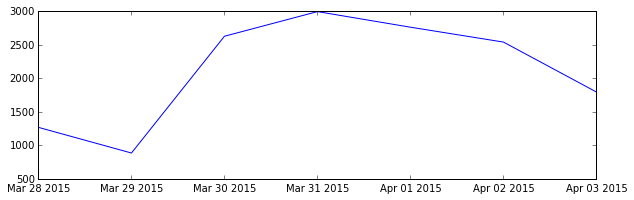

In [283]:
print type(dates)
print type(rider_counts)

# now to print the plot
plt.figure(figsize=(10,3)) 
plt.plot(dates,rider_counts)

# Challenge 5

In [405]:
day_counts_new_key = day_counts

In [406]:
# creating a copy of the old dict...no keys changed yet.
day_counts_new_key.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [(datetime.date(2015, 3, 28), 1268),
  (datetime.date(2015, 3, 29), 885),
  (datetime.date(2015, 3, 30), 2629),
  (datetime.date(2015, 3, 31), 2997),
  (datetime.date(2015, 4, 1), 2764),
  (datetime.date(2015, 4, 2), 2542),
  (datetime.date(2015, 4, 3), 1796)])

In [407]:
# get a list of all the old keys
old_keys = []
for key in day_counts.keys():
    old_keys.append(key)

In [287]:
print old_keys

[('A030', 'R083', '01-06-00', '23 ST-5 AVE'), ('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'), ('B014', 'R148', '00-00-01', 'PARKSIDE AVE'), ('A013', 'R081', '01-03-00', '49 ST-7 AVE'), ('B016', 'R098', '00-00-01', 'CHURCH AVE'), ('R159', 'R164', '01-06-00', '66 ST-LINCOLN'), ('N013', 'R035', '02-00-03', '168 ST-BROADWAY'), ('H016', 'R250', '00-00-02', 'GRAND ST'), ('A069', 'R044', '01-00-02', 'CHAMBERS ST'), ('G001', 'R151', '00-00-03', 'STILLWELL AVE'), ('R619', 'R059', '00-00-01', 'GRAND ARMY PLAZ'), ('N016A', 'R296', '00-00-02', '163 ST-AMSTERDM'), ('H027', 'R137', '01-06-01', 'MYRTLE AVE'), ('R190', 'R038', '00-00-02', '215 ST'), ('A002', 'R051', '02-00-00', 'LEXINGTON AVE'), ('R409', 'R449', '01-00-00', 'E 149 ST'), ('R252', 'R180', '00-00-03', '103 ST'), ('R612', 'R057', '01-00-04', 'BARCLAYS CENTER'), ('N049', 'R084', '01-03-00', '59 ST-COLUMBUS'), ('R206', 'R014', '02-03-03', 'FULTON ST'), ('PTH08', 'R540', '00-01-06', 'PATH WTC'), ('R329', 'R362', '00-00-00', 'ALLERTON AVE'), (

In [408]:
# we want list index 0, 1, 3...want to remove the 2 from all the keys
new_keys = [(key[0],key[1],key[3]) for key in old_keys]

In [409]:
new_keys[1:5]

[('N134', 'R385', 'ROCKAWAY BLVD'),
 ('B014', 'R148', 'PARKSIDE AVE'),
 ('A013', 'R081', '49 ST-7 AVE'),
 ('B016', 'R098', 'CHURCH AVE')]

In [410]:
# creating a dict of old keys and new keys
keys_dict = dict(zip(old_keys, new_keys))

In [412]:
keys_dict.items()[:5]

[(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
  ('A030', 'R083', '23 ST-5 AVE')),
 (('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'),
  ('N134', 'R385', 'ROCKAWAY BLVD')),
 (('B014', 'R148', '00-00-01', 'PARKSIDE AVE'),
  ('B014', 'R148', 'PARKSIDE AVE')),
 (('A013', 'R081', '01-03-00', '49 ST-7 AVE'),
  ('A013', 'R081', '49 ST-7 AVE')),
 (('B016', 'R098', '00-00-01', 'CHURCH AVE'), ('B016', 'R098', 'CHURCH AVE'))]

In [292]:
day_counts_new = dict((keys_dict[key], value) for (key, value) in day_counts.items())

In [293]:
day_counts_new

{('A002', 'R051', 'LEXINGTON AVE'): [(datetime.date(2015, 3, 28), 1288),
  (datetime.date(2015, 3, 29), 1033),
  (datetime.date(2015, 3, 30), 2357),
  (datetime.date(2015, 3, 31), 2516),
  (datetime.date(2015, 4, 1), 2570),
  (datetime.date(2015, 4, 2), 2532),
  (datetime.date(2015, 4, 3), 1759)],
 ('A006', 'R079', '5 AVE-59 ST'): [(datetime.date(2015, 3, 28), 803),
  (datetime.date(2015, 3, 29), 872),
  (datetime.date(2015, 3, 30), 1539),
  (datetime.date(2015, 3, 31), 1657),
  (datetime.date(2015, 4, 1), 1646),
  (datetime.date(2015, 4, 2), 1643),
  (datetime.date(2015, 4, 3), 1163)],
 ('A007', 'R079', '5 AVE-59 ST'): [(datetime.date(2015, 3, 28), 0),
  (datetime.date(2015, 3, 29), 0),
  (datetime.date(2015, 3, 30), 0),
  (datetime.date(2015, 3, 31), 0),
  (datetime.date(2015, 4, 1), 0),
  (datetime.date(2015, 4, 2), 0),
  (datetime.date(2015, 4, 3), 0)],
 ('A010', 'R080', '57 ST-7 AVE'): [(datetime.date(2015, 3, 28), 1687),
  (datetime.date(2015, 3, 29), 1539),
  (datetime.date(2015

# Challenge 6

In [294]:
station_keys = [(key[2]) for key in new_keys]

In [295]:
station_keys

['23 ST-5 AVE',
 'ROCKAWAY BLVD',
 'PARKSIDE AVE',
 '49 ST-7 AVE',
 'CHURCH AVE',
 '66 ST-LINCOLN',
 '168 ST-BROADWAY',
 'GRAND ST',
 'CHAMBERS ST',
 'STILLWELL AVE',
 'GRAND ARMY PLAZ',
 '163 ST-AMSTERDM',
 'MYRTLE AVE',
 '215 ST',
 'LEXINGTON AVE',
 'E 149 ST',
 '103 ST',
 'BARCLAYS CENTER',
 '59 ST-COLUMBUS',
 'FULTON ST',
 'PATH WTC',
 'ALLERTON AVE',
 'KOSCIUSZKO ST',
 '145 ST',
 '28 ST',
 '161 ST-YANKEE',
 'BROAD ST',
 '34 ST-PENN STA',
 'NASSAU AV',
 'WOODLAWN ROAD',
 '42 ST-BRYANT PK',
 'LEXINGTON AVE',
 'PATH WTC',
 '34 ST-HERALD SQ',
 '46 ST',
 '72 ST',
 'MORRIS PARK',
 '161 ST-YANKEE',
 '47-50 ST-ROCK',
 'CLINTON-WASH AV',
 '176 ST',
 '7 AV-PARK SLOPE',
 'BEACH 98 ST',
 '181 ST',
 '170 ST',
 '36 ST',
 'JFK JAMAICA CT1',
 'LAFAYETTE AVE',
 'SHEPHERD AVE',
 'NEVINS ST',
 '59 ST-COLUMBUS',
 'EAST BROADWAY',
 'KINGSTON AVE',
 'JAMAICA-179 ST',
 '14 ST-UNION SQ',
 '18 AVE',
 '25 ST',
 'FULTON ST',
 'KOSCIUSZKO ST',
 'LEFFERTS BLVD',
 '110 ST-CATHEDRL',
 'FOREST HILLS-71',
 'ST LA

In [296]:
keys_dict_updated = dict(zip(new_keys, station_keys))
day_counts_station = dict((keys_dict_updated[key], value) for (key, value) in day_counts_new.items())

In [297]:
day_counts_station

{'1 AVE': [(datetime.date(2015, 3, 28), 1061),
  (datetime.date(2015, 3, 29), 649),
  (datetime.date(2015, 3, 30), 1220),
  (datetime.date(2015, 3, 31), 1402),
  (datetime.date(2015, 4, 1), 1246),
  (datetime.date(2015, 4, 2), 1294),
  (datetime.date(2015, 4, 3), 916)],
 '103 ST': [(datetime.date(2015, 3, 28), 520),
  (datetime.date(2015, 3, 29), 427),
  (datetime.date(2015, 3, 30), 757),
  (datetime.date(2015, 3, 31), 862),
  (datetime.date(2015, 4, 1), 804),
  (datetime.date(2015, 4, 2), 870),
  (datetime.date(2015, 4, 3), 637)],
 '103 ST-CORONA': [(datetime.date(2015, 3, 28), 1395),
  (datetime.date(2015, 3, 29), 1217),
  (datetime.date(2015, 3, 30), 1891),
  (datetime.date(2015, 3, 31), 2095),
  (datetime.date(2015, 4, 1), 2184),
  (datetime.date(2015, 4, 2), 2039),
  (datetime.date(2015, 4, 3), 1510)],
 '104 ST': [(datetime.date(2015, 3, 28), 310),
  (datetime.date(2015, 3, 29), 208),
  (datetime.date(2015, 3, 30), 528),
  (datetime.date(2015, 3, 31), 529),
  (datetime.date(2015, 

# Challenge 7

In [299]:
%matplotlib inline
import matplotlib.pyplot as plt

dates_v2 = []
rider_counts_v2 = []
#print day_counts.items()[0]

values = day_counts_station.values()[0]
for x, y in values:
    dates_v2.append(x)
    rider_counts_v2.append(y)
    # print "I am appending date %s and count %s" % (x, y)
    
print dates

print rider_counts

[datetime.date(2015, 3, 28), datetime.date(2015, 3, 29), datetime.date(2015, 3, 30), datetime.date(2015, 3, 31), datetime.date(2015, 4, 1), datetime.date(2015, 4, 2), datetime.date(2015, 4, 3)]
[1268, 885, 2629, 2997, 2764, 2542, 1796]


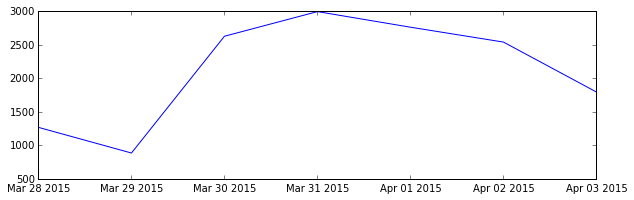

In [300]:
plt.figure(figsize=(10,3)) 
plt.plot(dates,rider_counts)

# Doing some project work

In [392]:
# we will use the datetime_counts dict that we created in earlier challenges because it has data by datetime
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day_station = {}
    for time, count in rows:
        day_station = time
        by_day_station[day_station] = by_day_station.get(day, 0) + count
    datetime_counts_old_key[turnstile] = sorted(by_day.items())
print datetime_counts_old_key.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'), [(datetime.datetime(2015, 3, 28, 0, 0), 24), (datetime.datetime(2015, 3, 28, 4, 0), 173), (datetime.datetime(2015, 3, 28, 8, 0), 386), (datetime.datetime(2015, 3, 28, 12, 0), 301), (datetime.datetime(2015, 3, 28, 16, 0), 220), (datetime.datetime(2015, 3, 28, 20, 0), 167), (datetime.datetime(2015, 3, 29, 0, 0), 24), (datetime.datetime(2015, 3, 29, 4, 0), 100), (datetime.datetime(2015, 3, 29, 8, 0), 294), (datetime.datetime(2015, 3, 29, 12, 0), 264), (datetime.datetime(2015, 3, 29, 16, 0), 206), (datetime.datetime(2015, 3, 29, 20, 0), 106), (datetime.datetime(2015, 3, 30, 0, 0), 22), (datetime.datetime(2015, 3, 30, 4, 0), 674), (datetime.datetime(2015, 3, 30, 8, 0), 817), (datetime.datetime(2015, 3, 30, 12, 0), 427), (datetime.datetime(2015, 3, 30, 16, 0), 382), (datetime.datetime(2015, 3, 30, 20, 0), 107), (datetime.datetime(2015, 3, 31, 0, 0), 31), (datetime.datetime(2015, 3, 31, 4, 0), 687), (datetime.datetime(2015, 3, 31, 8, 0), 102), (da

In [368]:
# station I want to look up: 42 ST-GRD CNTRL 4567S
keys_dict_updated_old_to_station = dict(zip(old_keys, station_keys))
datetime_counts_station = dict((keys_dict_updated_old_to_station[key], value) for (key, value) in datetime_counts_old_key.items())

In [369]:
datetime_counts_station

{'1 AVE': [(datetime.datetime(2015, 3, 28, 0, 0), 24),
  (datetime.datetime(2015, 3, 28, 4, 0), 173),
  (datetime.datetime(2015, 3, 28, 8, 0), 386),
  (datetime.datetime(2015, 3, 28, 12, 0), 301),
  (datetime.datetime(2015, 3, 28, 16, 0), 220),
  (datetime.datetime(2015, 3, 28, 20, 0), 167),
  (datetime.datetime(2015, 3, 29, 0, 0), 24),
  (datetime.datetime(2015, 3, 29, 4, 0), 100),
  (datetime.datetime(2015, 3, 29, 8, 0), 294),
  (datetime.datetime(2015, 3, 29, 12, 0), 264),
  (datetime.datetime(2015, 3, 29, 16, 0), 206),
  (datetime.datetime(2015, 3, 29, 20, 0), 106),
  (datetime.datetime(2015, 3, 30, 0, 0), 22),
  (datetime.datetime(2015, 3, 30, 4, 0), 674),
  (datetime.datetime(2015, 3, 30, 8, 0), 817),
  (datetime.datetime(2015, 3, 30, 12, 0), 427),
  (datetime.datetime(2015, 3, 30, 16, 0), 382),
  (datetime.datetime(2015, 3, 30, 20, 0), 107),
  (datetime.datetime(2015, 3, 31, 0, 0), 31),
  (datetime.datetime(2015, 3, 31, 4, 0), 687),
  (datetime.datetime(2015, 3, 31, 8, 0), 102),

In [378]:
datetime_counts_station["42 ST-TIMES SQ"]

[(datetime.datetime(2015, 3, 28, 0, 0), 24),
 (datetime.datetime(2015, 3, 28, 4, 0), 173),
 (datetime.datetime(2015, 3, 28, 8, 0), 386),
 (datetime.datetime(2015, 3, 28, 12, 0), 301),
 (datetime.datetime(2015, 3, 28, 16, 0), 220),
 (datetime.datetime(2015, 3, 28, 20, 0), 167),
 (datetime.datetime(2015, 3, 29, 0, 0), 24),
 (datetime.datetime(2015, 3, 29, 4, 0), 100),
 (datetime.datetime(2015, 3, 29, 8, 0), 294),
 (datetime.datetime(2015, 3, 29, 12, 0), 264),
 (datetime.datetime(2015, 3, 29, 16, 0), 206),
 (datetime.datetime(2015, 3, 29, 20, 0), 106),
 (datetime.datetime(2015, 3, 30, 0, 0), 22),
 (datetime.datetime(2015, 3, 30, 4, 0), 674),
 (datetime.datetime(2015, 3, 30, 8, 0), 817),
 (datetime.datetime(2015, 3, 30, 12, 0), 427),
 (datetime.datetime(2015, 3, 30, 16, 0), 382),
 (datetime.datetime(2015, 3, 30, 20, 0), 107),
 (datetime.datetime(2015, 3, 31, 0, 0), 31),
 (datetime.datetime(2015, 3, 31, 4, 0), 687),
 (datetime.datetime(2015, 3, 31, 8, 0), 102),
 (datetime.datetime(2015, 3, 

In [371]:
grand_central = datetime_counts_station["42 ST-GRD CNTRL"]

In [372]:
"""this turns the dates and counts for a turnstile into two lists"""
datetimes = []
rider_counts_gc = []
#print day_counts.items()[0]

for x, y in grand_central:
    datetimes.append(x)
    rider_counts_gc.append(y)
    # print "I am appending date %s and count %s" % (x, y)
    
print datetimes

print rider_counts_gc

[datetime.datetime(2015, 3, 28, 0, 0), datetime.datetime(2015, 3, 28, 4, 0), datetime.datetime(2015, 3, 28, 8, 0), datetime.datetime(2015, 3, 28, 12, 0), datetime.datetime(2015, 3, 28, 16, 0), datetime.datetime(2015, 3, 28, 20, 0), datetime.datetime(2015, 3, 29, 0, 0), datetime.datetime(2015, 3, 29, 4, 0), datetime.datetime(2015, 3, 29, 8, 0), datetime.datetime(2015, 3, 29, 12, 0), datetime.datetime(2015, 3, 29, 16, 0), datetime.datetime(2015, 3, 29, 20, 0), datetime.datetime(2015, 3, 30, 0, 0), datetime.datetime(2015, 3, 30, 4, 0), datetime.datetime(2015, 3, 30, 8, 0), datetime.datetime(2015, 3, 30, 12, 0), datetime.datetime(2015, 3, 30, 16, 0), datetime.datetime(2015, 3, 30, 20, 0), datetime.datetime(2015, 3, 31, 0, 0), datetime.datetime(2015, 3, 31, 4, 0), datetime.datetime(2015, 3, 31, 8, 0), datetime.datetime(2015, 3, 31, 8, 12, 33), datetime.datetime(2015, 3, 31, 12, 0), datetime.datetime(2015, 3, 31, 16, 0), datetime.datetime(2015, 3, 31, 20, 0), datetime.datetime(2015, 4, 1, 0,

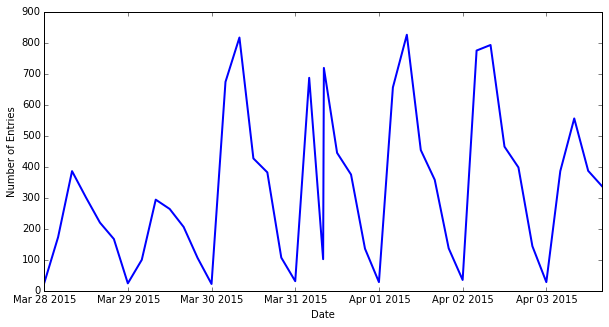

In [373]:
plt.figure(figsize=(10,5)) 
plt.plot(datetimes,rider_counts_gc, linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.title('')

In [428]:
with open('turnstile_150404.txt') as f:
    reader_v2 = csv.reader(f)
    rows_v2 = [[cell.strip() for cell in row] for row in reader_v2]

assert rows_v2.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']
# creating empty dict that we pass data to
raw_readings_v2 = {}
# reading file row by row, creating tuple of first 3 elements for key.  All others are values
for row in rows_v2:
    raw_readings_v2.setdefault(tuple(row[3]), []).append(tuple(row[4:]))

In [426]:
datetime_cumulative_v2 = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows_v2]
                       for turnstile, rows_v2 in raw_readings_v2.items()}

In [427]:
for rows_v2 in datetime_cumulative_v2.values():
    assert rows_v2 == sorted(rows_v2)

AssertionError: 

In [420]:
datetime_count_times_v2 = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}
datetime_count_times_v2.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [[datetime.datetime(2015, 3, 28, 0, 0), 83, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 28, 4, 0), 27, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 28, 8, 0), 121, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 28, 12, 0), 333, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 28, 16, 0), 474, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 28, 20, 0), 230, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 0, 0), 63, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 4, 0), 21, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 8, 0), 83, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 12, 0), 253, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 16, 0), 303, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 29, 20, 0), 162, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3,